# W4 Lab Assignment

This lab is more about experimenting instead of coding. We will cover Stevens’ power-law and matplotlib's colormaps.

First, import libraries and use the `matplotlib inline` magic command:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

# Stevens’ power-law and your own psychophysics experiment!

Let's do the experiment. The procedure is as follows:

1. Generate a random number between \[0.01,0.1\];
1. Use a horizontal bar to represent the number, i.e., the length of the bar is equal to the number;
1. Guess the length of the bar by comparing it to two other bars with length 0.01 and 0.1 respectively;
1. Store your guess (perceived length) and actual length to two lists;
1. Repeat the above steps several times;
1. Check whether Steven's power-law holds.

First, we use two lists to store perceived and actual length.

In [160]:
import random
import time

n1 = 0.01
length_perceived = []
length_actual = []

Then, we can run the experiment.

The [**`random`**](https://docs.python.org/2/library/random.html) module in Python provides various random number generators, and the [**`random.uniform(a,b)`**](https://docs.python.org/2/library/random.html#random.uniform) function returns a float in \[a,b\]. Thus, `n2 = n1 * random.uniform(1,10)` means `n2` will be a random number in the interval \[0.01\*1,0.01\*10\], which is \[0.01,0.1\].

We can plot horizontal bars using the [**`pyplot.barh()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) function. The lengths of them are 0.01, `n2`, 0.1.

([<matplotlib.axis.YTick at 0x11fa0ac88>,
 <a list of 3 Text yticklabel objects>)

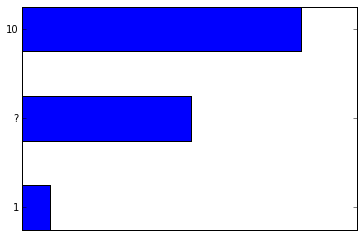

In [157]:
n2 = n1 * random.uniform(1,10)

plt.barh(np.arange(3), [n1, n2, 0.1], height=0.5)
plt.gca().set_frame_on(True)
plt.gca().get_xaxis().set_visible(False)
plt.yticks(np.arange(3)+0.25, ('1', '?', '10'))

From the plot above, guess the ratio between the length of the middle and the bottom bar. We can think of this more directly: If the length of the bottom bar is 1 and the top one is 10, what is the length of the middle one?

Put your guess (perceived length) in `length_perceived.append()`. And the `length_actual.append(n2/n1)` will store the actual ratio.

In [147]:
length_perceived.append(3) # put the ratio that you perceived and run this cell (shift + enter). 

length_actual.append(n2/n1)
print('{:.2f}'.format(n2/n1))

2.31


Run the procedure several times (run the above two code cells several times).

Now we can draw the scatter plot of perceived and actual length. The [**`scatter()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function will do this.

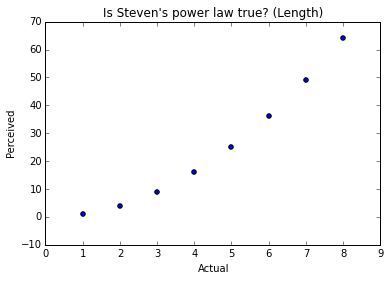

In [162]:
length_actual = [1,2,3,4,5,6,7,8]
length_perceived = [1,4,9,16,25,36,49,64]
# Comment out the above two lines and use your experiment results.
plt.scatter(length_actual, length_perceived)
plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")

After plotting, let's fit the relation between actual and perceived lengths using a polynomial function. We can easily do it using [**`curve_fit(f, x, y)`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) in Scipy, which is to fit $x$ and $y$ using the function `f`. In our case, $f = a*x^b +c$.

In [168]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

popt, pcov = curve_fit(func, length_actual, length_perceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

1.00 x^2.00 + 0.00


Similar to the above experiment, we now represent a random number as a circle, and the area of the circle is equal to the number.

First, calculate the radius of a circle from its area and then plot using the **`Circle()`** function. `plt.Circle((0,0), r)` will plot a circle centered at (0,0) with radius `r`.

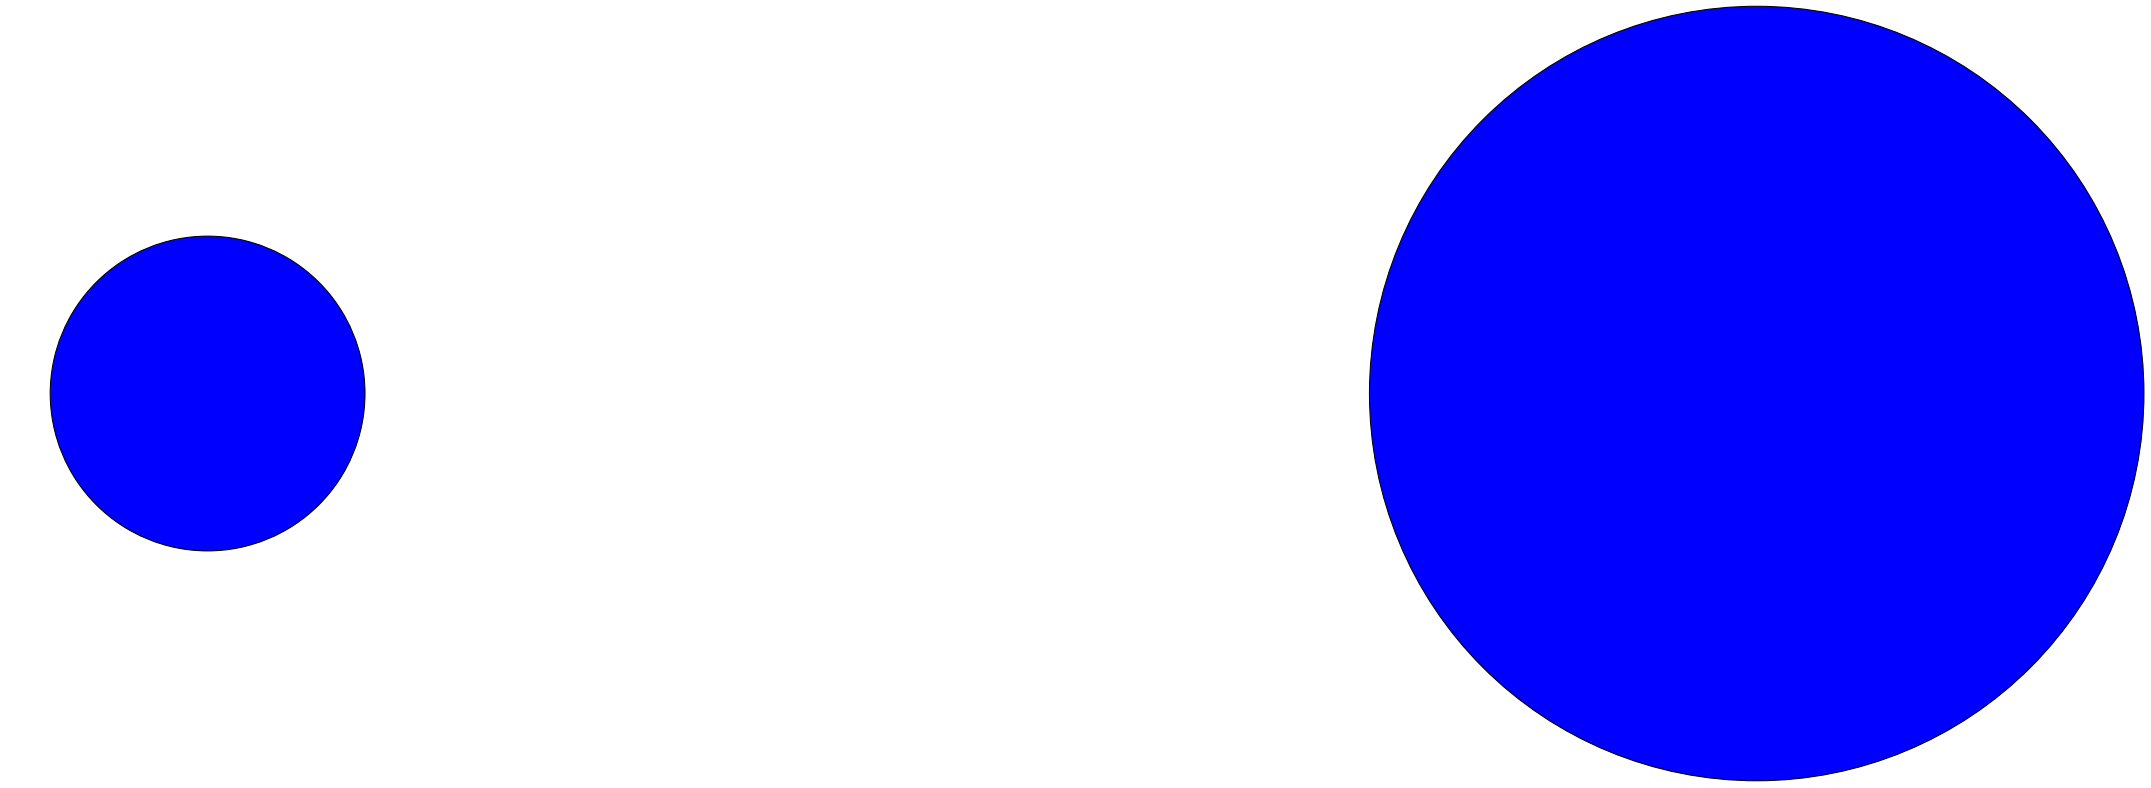

In [158]:
import math

radius1 = math.sqrt(n1/math.pi) # area = pi * r * r
radius2 = math.sqrt(n2/math.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
plt.gca().add_artist(circ1)
plt.gca().add_artist(circ2)

Write the code to run the experiment, plot and fit your results in the cell below.

In [5]:
# implement here


8.376688295146515


# Colormaps

Let's plot a sine and cosine wave respectively with red and green color.

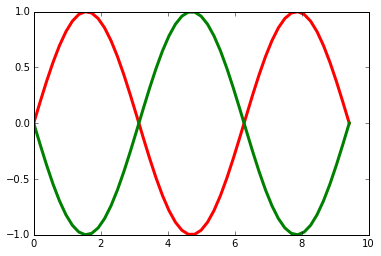

In [6]:
x = np.linspace(0, 3*np.pi)
plt.plot(x, np.sin(x), color='r', lw=3)
plt.plot(x, np.sin(x-np.pi), color='g', lw=3)

We can also use different color schemes in matplotlib. Here you can find them

http://matplotlib.org/users/colormaps.html

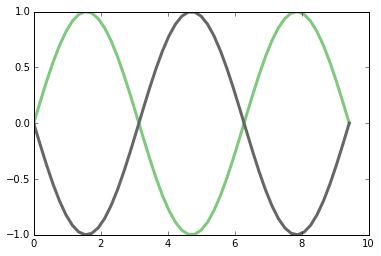

In [7]:
plt.plot(x, np.sin(x), color=plt.cm.Accent(0), lw=3)
plt.plot(x, np.sin(x-np.pi), color=plt.cm.Accent(1.0), lw=3)

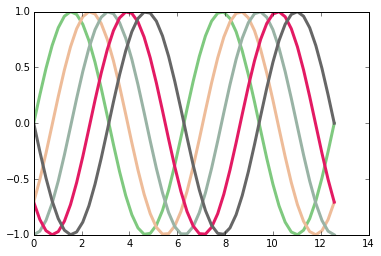

In [9]:
num_lines = 5
x = np.linspace(0, 4*np.pi)
shift = np.linspace(0, np.pi, num_lines)
color_idx = np.linspace(0, 1, num_lines)
for i in range(len(color_idx)):
    plt.plot(x, np.sin(x - shift[i]), color=plt.cm.Accent(color_idx[i]), lw=3)

Try different color schemes by changing the `color=plt.cm.Accent(color_idx[i]), lw=3)` with different scheme names.

# Colormap and images

http://matplotlib.org/users/image_tutorial.html

We can also display an image using Colormaps. First read it using the [`imread()`](http://matplotlib.org/api/image_api.html#matplotlib.image.imread) function that returns an `numpy.array()`.

In [5]:
import colormaps as cmaps
import matplotlib.image as mpimg

In [ ]:
img = mpimg.imread('sneakySnake.png')
lum_img = np.flipud(img[:,:,0])

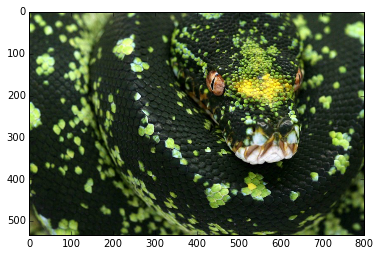

In [36]:
plt.imshow(img)

In [37]:
img[0]

array([[ 0.2       ,  0.28627452,  0.19607843],
       [ 0.16862746,  0.25490198,  0.16470589],
       [ 0.17254902,  0.24705882,  0.17254902],
       ..., 
       [ 0.53725493,  0.64313728,  0.52156866],
       [ 0.50196081,  0.60000002,  0.48235294],
       [ 0.46666667,  0.56470591,  0.44705883]], dtype=float32)

In [38]:
img[0][0]

array([ 0.2       ,  0.28627452,  0.19607843], dtype=float32)

We can also flip the image in the up/down direction, using the [`numpy.flipud()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.flipud.html) function.

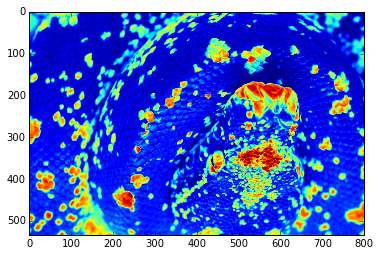

In [42]:
plt.imshow(np.flipud(img[:,:,0]))

Display the image using other Colormaps.

In [ ]:
plt.pcolormesh(lum_img, cmap=cmaps.viridis)
plt.colorbar()

From http://matplotlib.org/examples/pylab_examples/pcolor_demo.html

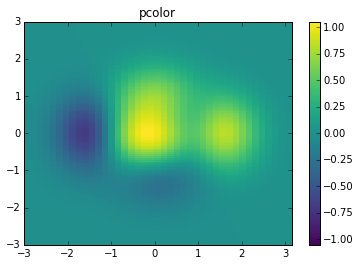

In [28]:
dx, dy = 0.15, 0.05
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

plt.pcolor(x, y, z, cmap=cmaps.viridis, vmin=z_min, vmax=z_max)
plt.title('pcolor')
# set the limits of the plot to the limits of the data
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()


In [43]:
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]



In [45]:
y

array([[-3.  , -3.  , -3.  , ..., -3.  , -3.  , -3.  ],
       [-2.95, -2.95, -2.95, ..., -2.95, -2.95, -2.95],
       [-2.9 , -2.9 , -2.9 , ..., -2.9 , -2.9 , -2.9 ],
       ..., 
       [ 2.9 ,  2.9 ,  2.9 , ...,  2.9 ,  2.9 ,  2.9 ],
       [ 2.95,  2.95,  2.95, ...,  2.95,  2.95,  2.95],
       [ 3.  ,  3.  ,  3.  , ...,  3.  ,  3.  ,  3.  ]])

In [46]:
x

array([[-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       ..., 
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15]])